In [213]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn 
from IPython.display import display
from sklearn.datasets import make_blobs
import seaborn

In [214]:
vacancies = pd.read_json('ml_vacancies.json')
vacancies.head(5)

,amount_of_employees,characteristics,company,education_level,field_of_study,price,skill,title,vacancy_id
0,250+,Omgang met details|Conceptueel denken,van der Heyden,HBO/WO,Economie,250,Photoshop|EHBO|MySQL|Ruby|Teamwork,IT Intern,1
1,10 - 50,Oordeelsvorming,Kolen,MBO,Veiligheid en sport,800,Photoshop|EHBO|MySQL|Ruby|Teamwork,Contact Center Intern,2
2,1 - 10,Individualiteit|Kwaliteitsgerichtsheid|Leiders...,Kolen,MBO,"Productie, bouw & ambachten",100,Teamwork|Nieuwschierig,ICT Network Trainee,3
3,250+,Ondernemerschap|Communiceren|Adviseren|Accuraa...,van der Velden CV,HBO/WO,Ontwerp & architectuur,150,Photoshop|MySQL|Nieuwschierig,Customer Services Clerk/Teller,4
4,50 - 250,Lerend vermogen|Onderhandelen,Gerritsen van Es IBC,HBO/WO,Zorg en welzijn,100,Photoshop|EHBO|Teamwork|Nieuwschierig,Political and Social Journalism,5


Totaal aantal unieke bedrijven: 6


Text(0, 0.5, '# AANTAL VACATURES')

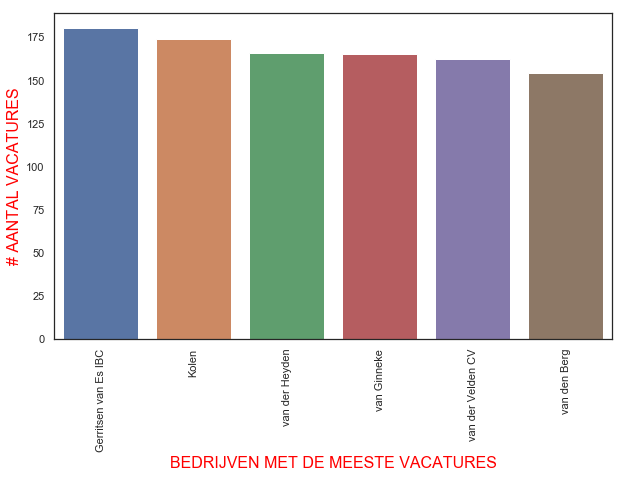

In [215]:
#PART 1, Data Analysis
#Now, we are finding total number of compnaies who require data scientist
total_no_company=vacancies['company'].nunique()
print('Totaal aantal unieke bedrijven:',total_no_company)

#finding highest number of vacancy in a company
most_vacancy= vacancies.groupby(['company'])['field_of_study'].count()
most_vacancy=most_vacancy.reset_index(name='field_of_study')
most_vacancy=most_vacancy.sort_values(['field_of_study'],ascending=False)
pareto_df=most_vacancy
most_vacancy=most_vacancy.head(10)

# Plot graph for top most vacancy
fig, ax = plt.subplots(figsize = (10,6))
ax=seaborn.barplot(x="company", y="field_of_study", data=most_vacancy)    
ax.set_xticklabels(most_vacancy['company'],rotation=90)  
ax.set_xlabel('BEDRIJVEN MET DE MEESTE VACATURES',fontsize=16, color='red')
ax.set_ylabel('# AANTAL VACATURES',fontsize=16,color='red') 

In [216]:
most_populair_field = vacancies['field_of_study'].mode()
print('Populairste studiegebied: \n', most_populair_field)

Populairste studiegebied: 
 0    Zorg en welzijn
dtype: object


array([<matplotlib.axes._subplots.AxesSubplot object at 0x13054fc18>],
      dtype=object)

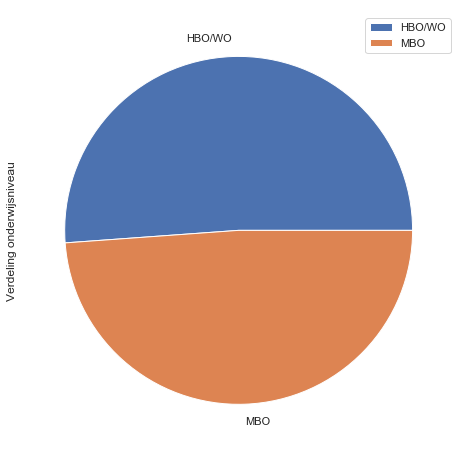

In [217]:
vacancies_by_education_level = vacancies.groupby(['education_level'])['vacancy_id'].count()

# --- dataset 1: just 4 values for 4 groups:
df = pd.DataFrame(vacancies_by_education_level.values, index=vacancies_by_education_level.keys(), columns=['Verdeling onderwijsniveau'])
 
# make the plot
df.plot(kind='pie', subplots=True, figsize=(8, 8))

Text(0, 0.5, 'STAGEVERGOEDING')

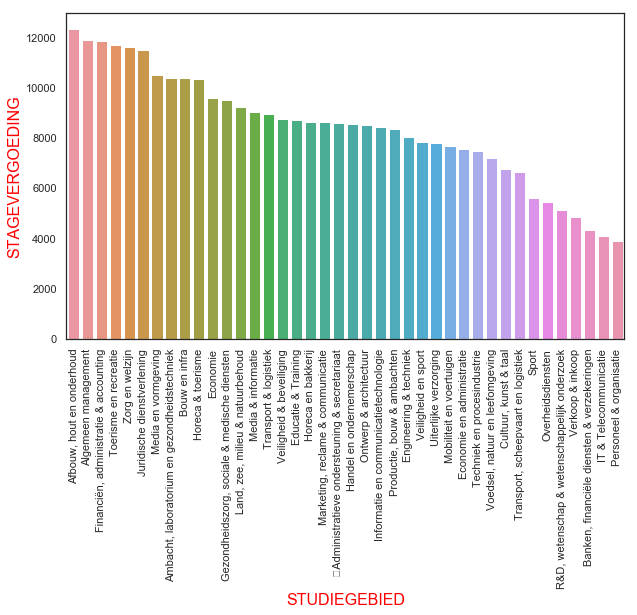

In [218]:
best_paid_field_of_study= vacancies.groupby(['field_of_study'])['price'].sum()
best_paid_field_of_study=best_paid_field_of_study.reset_index(name='price')
best_paid_field_of_study=best_paid_field_of_study.sort_values(['price'],ascending=False)

fig, ax = plt.subplots(figsize = (10,6))
ax=seaborn.barplot(x="field_of_study", y="price", data=best_paid_field_of_study)    
ax.set_xticklabels(best_paid_field_of_study['field_of_study'],rotation=90)
ax.set_xlabel('STUDIEGEBIED',fontsize=16, color='red')
ax.set_ylabel('STAGEVERGOEDING',fontsize=16,color='red')

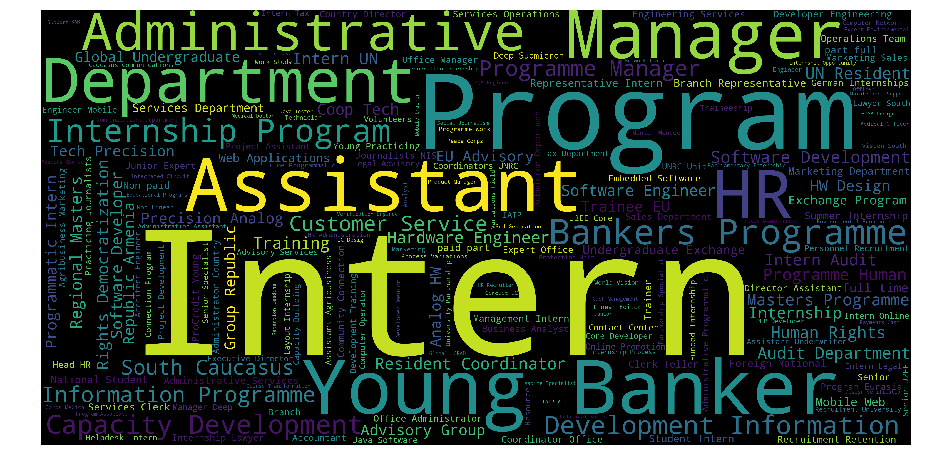

In [219]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Create a wordcloud of the vacancy titles
vacancies['title'] = vacancies['title'].fillna("").astype('str')
title_corpus = ' '.join(vacancies['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

In [220]:

# Make a census of the keywords
characteristic_labels = set()
for s in vacancies['characteristics'].str.split('|').values:
    characteristic_labels = characteristic_labels.union(set(s))

# Function that counts the number of times each of the characteristic keywords appear
def count_word(dataset, ref_col, census):
    keyword_count = dict()
    for s in census: 
        keyword_count[s] = 0
    for census_keywords in dataset[ref_col].str.split('|'):        
        if type(census_keywords) == float and pd.isnull(census_keywords): 
            continue        
        for s in [s for s in census_keywords if s in census]: 
            if pd.notnull(s): 
                keyword_count[s] += 1
    #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

# Calling this function gives access to a list of characteristic keywords which are sorted by decreasing frequency
keyword_occurences, dum = count_word(vacancies, 'characteristics', characteristic_labels)
keyword_occurences[:5]

[['Coalities sluiten', 73],
 ['Resultaatgerichtheid', 72],
 ['Omgevingsbewustzijn', 71],
 ['Stresstolerantie', 70],
 ['Omgang met details', 70]]

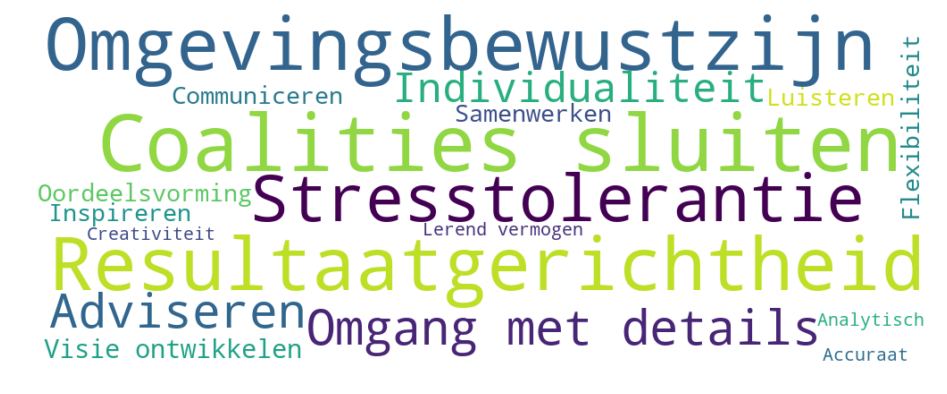

In [223]:

# Define the dictionary used to produce the characteristic wordcloud
characteristics = dict()
trunc_occurences = keyword_occurences[0:18]
for s in trunc_occurences:
    characteristics[s[0]] = s[1]

# Create the wordcloud
characteristics_wordcloud = WordCloud(width=1000,height=400, background_color='white')
characteristics_wordcloud.generate_from_frequencies(characteristics)

# Plot the wordcloud
f, ax = plt.subplots(figsize=(16, 8))
plt.imshow(characteristics_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Vacancy simalarity based on characteristics

Predict vacancies that are similar to x.

In [225]:
# Break up the big characteristics string into a string array
vacancies['characteristics'] = vacancies['characteristics'].str.split('|')
# Convert characteristics to string value
vacancies['characteristics'] = vacancies['characteristics'].fillna("").astype('str')

In [226]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(vacancies['characteristics'])
tfidf_matrix.shape

(1001, 962)

In [227]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim[:4, :4]

array([[1.        , 0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.06507725],
       [0.        , 0.        , 0.06507725, 1.        ]])

In [228]:
# Build a 1-dimensional array with vacancy titles
titles = vacancies['title']
indices = pd.Series(vacancies.index, index=vacancies['title'])

# Function that get vacancy recommendations based on the cosine similarity score of vacancy characteristics
def characteristic_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
#     sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    vacancy_indices = [i[0] for i in sim_scores]
    return titles.iloc[vacancy_indices]


### The following recommendations are outputted

In [229]:
characteristic_recommendations('HR Manager').head(20)

1              Contact Center Intern
2                ICT Network Trainee
3     Customer Services Clerk/Teller
4    Political and Social Journalism
Name: title, dtype: object

In [230]:
characteristic_recommendations('IATP Gyumri Trainer').head(20)

1             Contact Center Intern
2               ICT Network Trainee
3    Customer Services Clerk/Teller
Name: title, dtype: object